## Análisis de los ETFs apalancados x2

In [26]:
# Carga de librerías
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

### 1. Definición de funciones auxiliares

In [27]:
def get_etf_data(ticker, start_date, end_date):
    """
    Descarga las series temporales de cualquier ticker utilizando Yahoo Finance.
    
    INPUTS:
        * ticker: (str) nombre del ticker
        * start_date: (str) fecha en formato YYYY-MM-DD
        * end_date: (str) fecha en formato YYYY-MM-DD
    """
    
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        return data['Adj Close']
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

In [28]:
def calculate_daily_returns(prices):
    """
    Calcula los retornos diarios de cada serie temporal.
    
    INPUTS:
        * prices: array con los precios de un activo.
    """
    return prices.pct_change().dropna()

In [29]:
def calculate_cumulative_returns(returns):
    """
    Calcula los retornos acumulados de un activo.
    
    INPUTS:
        * returns: serie con los retornos diarios del activo.
    """
    return (returns + 1).cumprod()

### 2. Carga de datos

In [30]:
# Definimos las fechas de inicio y final en nuestro análisis
start_date = '2018-01-01'
end_date = '2023-07-28'

# SPY (ETF del SP500 sin apalancamiento)
spy_ticker = 'SPY'
spy_data = get_etf_data(spy_ticker, start_date, end_date)

# SSO (ETF del SP500 con doble apalancamiento)
sso_ticker = 'SSO'
sso_data = get_etf_data(sso_ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### 3. Cálculo de los retornos diarios y  acumulados

In [31]:
spy_returns = calculate_daily_returns(spy_data)*100
sso_returns = calculate_daily_returns(sso_data)*100
spy_cumulative_returns = calculate_cumulative_returns(spy_returns/100)*100
sso_cumulative_returns = calculate_cumulative_returns(sso_returns/100)*100

### 4. Gráfico de dispersión de la primera figura

<ipython-input-32-c05e17c59ac3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_xticks()])
<ipython-input-32-c05e17c59ac3>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])


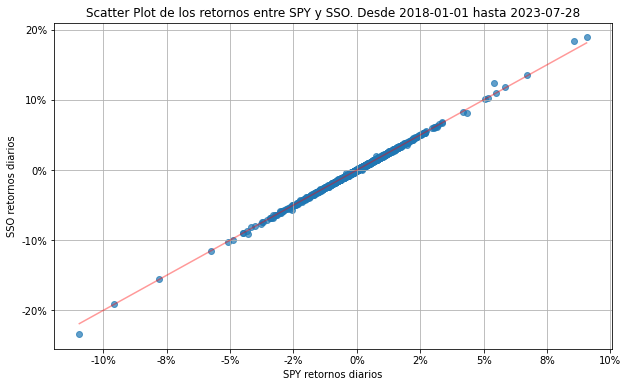

In [32]:
plt.figure(figsize=(10, 6))
data_x = np.linspace(min(spy_returns), max(spy_returns),10000)
plt.plot(data_x, data_x*2, 'r', alpha = 0.4)
plt.scatter(spy_returns, sso_returns, alpha=0.7)
plt.xlabel('SPY retornos diarios')
plt.ylabel('SSO retornos diarios')
plt.title('Scatter Plot de los retornos entre SPY y SSO. Desde ' +\
          start_date + ' hasta ' + end_date)
plt.grid(True)
plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_xticks()])
plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])
plt.show()

### 5. Gráfico de retornos totales iniciando con 100 euros, Figura 2

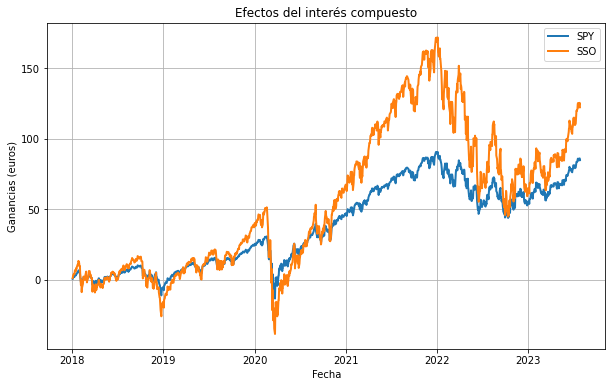

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(spy_cumulative_returns - 100, label='SPY', linewidth=2)
plt.plot(sso_cumulative_returns - 100, label='SSO', linewidth=2)
plt.xlabel('Fecha')
plt.ylabel('Ganancias (euros)')
plt.title('Efectos del interés compuesto')
plt.grid(True)
plt.legend()
plt.show()

### 6. Gráfico del ratio de retornos entre ambos ETFs, Figura 3

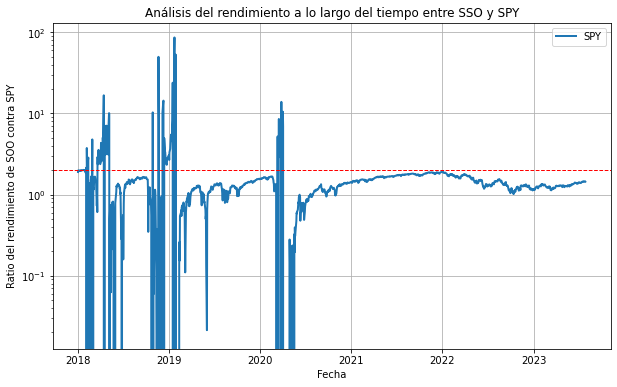

In [34]:
plt.figure(figsize=(10, 6))
plt.semilogy((sso_cumulative_returns/100 - 1)/(spy_cumulative_returns/100 - 1), label='SPY', linewidth=2)
plt.axhline(2, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Fecha')
plt.ylabel('Ratio del rendimiento de SOO contra SPY')
plt.title('Análisis del rendimiento a lo largo del tiempo entre SSO y SPY')
plt.grid(True)
plt.legend()
plt.show()